In [11]:
import pandas as pd #Import pandas for data manipulation
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

In [3]:
dtf = pd.read_csv("marketing.csv")#LEER el archivo CSV

In [4]:
dtf.head(100)#Mostrar las primeras 100 filas del DataFrame

,ID,frecuencia_compra,gasto_mensual,tiempo_cliente,participa_promociones,interaccion_email,clase_cliente
0,1,4,30,2.5,Si,Siempre,Fiel
1,2,1,10,0.5,No,Nunca,En_riesgo
2,3,2,15,1.2,No,A_veces,Ocasional
3,4,5,50,3.0,Si,Siempre,Fiel
4,5,3,18,1.5,Si,A_veces,Ocasional
5,6,0,5,0.3,No,Nunca,En_riesgo
6,7,2,25,2.0,Si,Siempre,Ocasional
7,8,1,8,0.8,No,Nunca,En_riesgo
8,9,4,40,2.3,Si,A_veces,Fiel
9,10,2,12,1.1,No,A_veces,Ocasional


In [5]:
dtf.dropna(inplace=True)#Eliminar filas con valores nulos

In [6]:
dtf = dtf.drop_duplicates()#Eliminar filas duplicadas

In [16]:
# Definir las características y la variable objetivo
label_cols =["participa_promociones","interaccion_email","clase_cliente"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
# --- Codificación ---
for col in label_cols:
    le = LabelEncoder()
    dtf[col] = le.fit_transform(dtf[col])
    
# --- entrenamiento y prueba ---
X = dtf.drop("clase_cliente", axis=1)
y = dtf["clase_cliente"]



In [ ]:
# División  entrenamiento/prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:

#  Entrenar árbol de decisión (sin poda)
modelo_sin_poda = DecisionTreeClassifier(random_state=42)
modelo_sin_poda.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

DecisionTreeClassifier(criterion='entropy', random_state=42)

NameError: name 'le_dict' is not defined

[[185   4   0   0]
 [ 19  29   0   0]
 [  0   1   0   0]
 [  6   5   0   0]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       189
           1       0.74      0.60      0.67        48
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        11

    accuracy                           0.86       249
   macro avg       0.41      0.40      0.40       249
weighted avg       0.81      0.86      0.83       249



C:\Users\RUDY PICO\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RUDY PICO\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RUDY PICO\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [13]:
cm=confusion_matrix(
    y_true = y_test,
    y_pred = y_pred
)

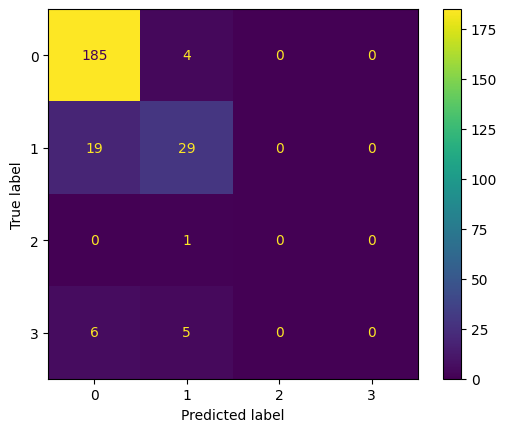

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Podado

C:\Users\RUDY PICO\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_split=20,
                                              random_state=123),
             param_grid={'ccp_alpha': array([ 0.        ,  2.63157895,  5.26315789,  7.89473684, 10.52631579,
       13.15789474, 15.78947368, 18.42105263, 21.05263158, 23.68421053,
       26.31578947, 28.94736842, 31.57894737, 34.21052632, 36.84210526,
       39.47368421, 42.10526316, 44.73684211, 47.36842105, 50.        ]),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
             return_train_score=True)

{'ccp_alpha': 0.0, 'max_depth': 1} 0.8388451612903225


In [17]:
modelo_final= grid.best_estimator_

In [19]:
print(classification_report(y, y_final,zero_division=0))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       929
           1       1.00      0.43      0.61       265
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        47

    accuracy                           0.84      1244
   macro avg       0.46      0.36      0.38      1244
weighted avg       0.83      0.84      0.80      1244



Profundidad del árbol: 1
Número de nodos terminales: 2


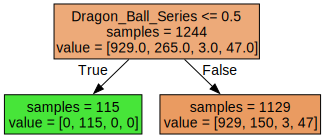